In [2]:
import ipywidgets as widgets
from IPython.core.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\Nada FH\AppData\Local\Temp\ipykernel_20556\1087634039.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Markdown, display


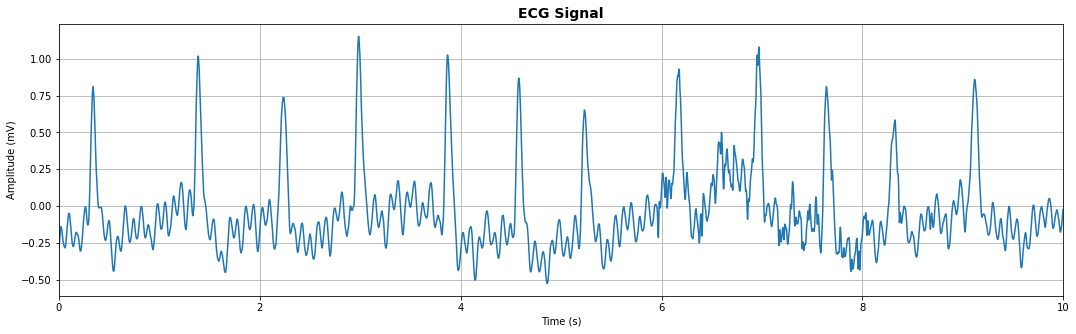

In [3]:
df = pd.read_excel('SuddecCardiacDeathv3.xlsx', header=[0,1])
t = df[df.columns[0]]
s = df[df.columns[1]]
fs = 1/0.004
N = len(df.index)

plt.figure(figsize=((18,5)))
plt.plot(t*0.004,s)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Signal",fontweight="bold", size=14)
plt.xlim(0,10)
plt.grid()
plt.show()

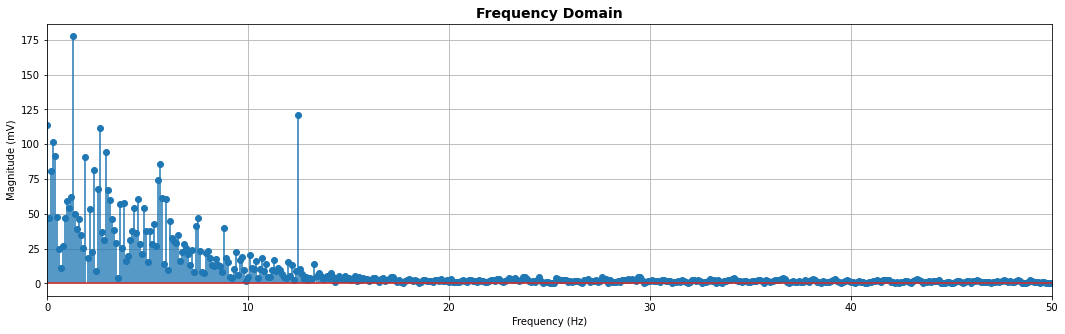

In [4]:
X_realin = np.zeros(N)
X_imajin = np.zeros(N)
MagDFTin = np.zeros(N)
ohm = np.zeros(N)

for i in range(int(-fs//2),int(fs//2)):
    ohm[i] =2*np.pi*i/fs

for k in range(N):
    for n in range(N):
        X_realin[k] += s[n]*np.cos(2*np.pi*k*n/N)
        X_imajin[k] -= s[n]*np.sin(2*np.pi*k*n/N)

for k in range(N):
    MagDFTin[k] = np.sqrt(np.square(X_realin[k])+np.square(X_imajin[k]))
    
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)

plt.figure(figsize=((18,5)))
plt.stem(k*fs/N,MagDFTin[n])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (mV)")
plt.title("Frequency Domain",fontweight="bold", size=14)
plt.xlim(0,50)
plt.grid()
plt.show()

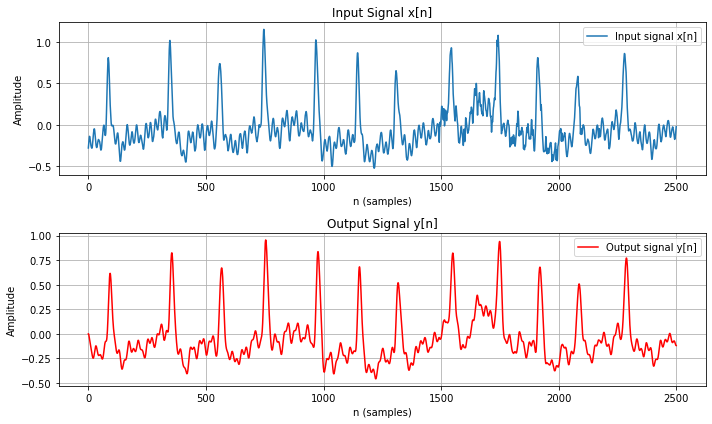

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
T = 1/fs  # Sampling period (adjust as needed)
fc = 8
omega_c = 2*np.pi*fc  # Cutoff frequency (adjust as needed)

# Define the input signal x[n]
x = s 
N = len(s)

# Initialize the output signal y[n] with zeros
y = np.zeros(N)

# Calculate y[n] using the difference equation
for n in range(2, N):
    y[n] = ((8 / T**2 - 2 * omega_c**2) * y[n-1] - (4 / T**2 - 2 * np.sqrt(2) * omega_c / T + omega_c**2) * y[n-2] + omega_c**2 * x[n]
        + 2 * omega_c**2 * x[n-1] + omega_c**2 * x[n-2]) / (4 / T**2 + 2 * np.sqrt(2) * omega_c / T + omega_c**2)

# Plot the input and output signals
plt.figure(figsize=(10, 6))

# Plot input signal x[n]
plt.subplot(2, 1, 1)
plt.plot(x, label='Input signal x[n]')
plt.title('Input Signal x[n]')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot output signal y[n]
plt.subplot(2, 1, 2)
plt.plot(y, label='Output signal y[n]', color='r')
plt.title('Output Signal y[n]')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
